<a href="https://colab.research.google.com/github/yuki-2000/Image_processing_lecture/blob/main/IP2022_04_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### 初期設定（このセルの中身は触らなくて良い）
import numpy as np # 数値解析パッケージnumpyのimport
import cv2 # 画像処理パッケージopencvのimport
import matplotlib.pyplot as plt # 描画パッケージmatplotlibのimport
import imutils


# Google Colab固有の設定
from google.colab import files
from google.colab.patches import cv2_imshow

# Google driveのmount
from google.colab import drive
drive.mount('/content/drive/')
# Google Colab用directoryに移動
%cd "/content/drive/MyDrive/Colab Notebooks/画像処理/"



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/画像処理


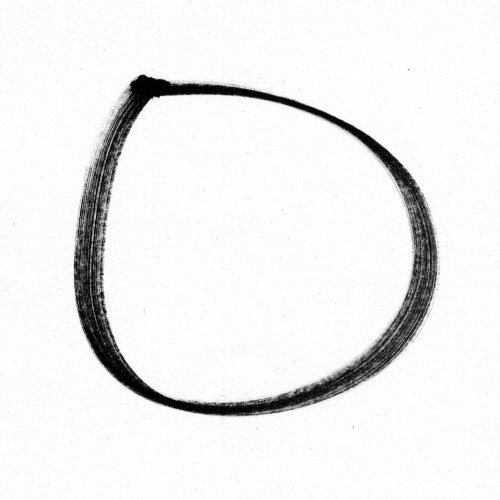

In [ ]:
### 1-1: 画像の読込と表示（このセルの中身は触らなくて良い）

img1 = imutils.url_to_image('https://bit.ly/3TduyO5',cv2.IMREAD_GRAYSCALE)
if img1 is None:
  print('Image file not found.')

cv2_imshow(img1)


In [ ]:
rows,cols =img1.shape # 画像の大きさを取得
bin_img1_1 = np.zeros((rows,cols), np.uint8) # 2値化結果を記録する白い画像を用意
bin_img1_2 = np.zeros((rows,cols), np.uint8) # 2値化結果を記録する白い画像を用意

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255


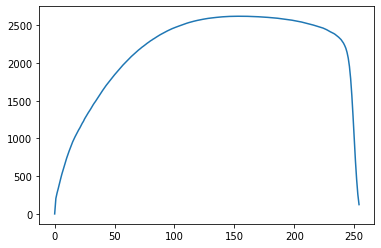

In [ ]:
### 課題4-1：判別分析法を実装

variances_b = [0]


for Threshold in range(1,256):
  print(Threshold)
  under = []
  upper = []

  # ラスタ走査して画素毎に2値化
  for value in img1.flatten():
      if value <= Threshold:
        under.append(value)
      else:
        upper.append(value)

  w1 = len(under)
  mu1 = np.mean(under)
  w2 = len(upper)
  mu2 = np.mean(upper)
  
  variances_b.append(w1*w2*(mu1-mu2)**2/(w1+w2)**2)

plt.plot(range(256), variances_b) 


Treshold = 154


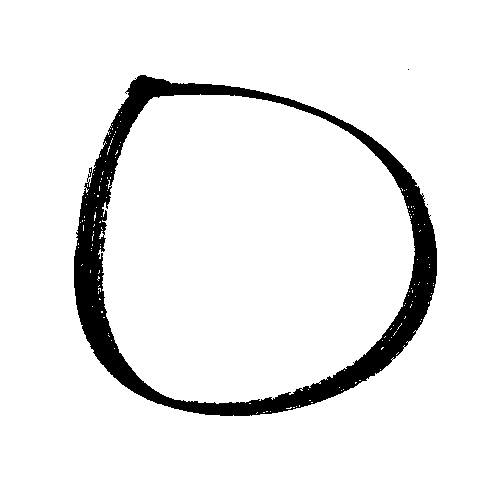

In [ ]:
Threshold = variances_b.index(max(variances_b))
print("Treshold =",Threshold)
# ラスタ走査して画素毎に2値化
for x in range(rows):
  for y in range(cols):
    if img1[x,y] <= Threshold:
      bin_img1_1[x,y] = 0
    else:
      bin_img1_1[x,y] = 255

cv2_imshow(bin_img1_1)

In [ ]:
### 課題4-2：Euler数の計算
rows = 5
cols = 9
#img2 = np.zeros((5, 9), np.uint8)
#print(img2)
img2 = [[0,1,1,1,0,0,1,0,1],
        [1,0,1,0,0,0,1,0,0],
        [1,1,1,1,0,0,1,1,0],
        [1,0,1,0,0,0,1,0,1],
        [1,1,0,0,0,0,0,1,0]]

img2 = np.array(img2)
cv2_imshow(img2)

num_V = rows*cols


num_E = 0
for i in range(rows):
  for j in range(cols-1):
    if img2[i,j]==1 and img2[i,j+1]==1:
      num_E +=1
for i in range(rows-1):
  for j in range(cols):
    if img2[i,j]==1 and img2[i+1,j]==1:
      num_E +=1



num_D = 0
mat_D1 = np.array([[1,0],[0,1]])
mat_D2 = np.array([[0,1],[1,0]])
num_T = 0
mat_T1 = np.array([[1,1],[1,0]])
mat_T2 = np.array([[1,0],[1,1]])
mat_T3 = np.array([[0,1],[1,1]])
mat_T4 = np.array([[1,1],[0,1]])
num_F = 0
mat_F = np.array([[1,1],[1,1]])


for i in range(rows-1):
  for j in range(cols-1):
    mat22 = img2[i:i+2,j:j+2]
    #print(mat22)


    if np.array_equal(mat22,mat_D1) or np.array_equal(mat22,mat_D2):
      num_D += 1
    
    if np.array_equal(mat22,mat_T1) or np.array_equal(mat22,mat_T2)or np.array_equal(mat22,mat_T3)or np.array_equal(mat22,mat_T4):
      num_T += 1

    if np.array_equal(mat22,mat_F):
      num_F += 1
    


print("Result")
print("V:",num_V )
print("E:",num_E )
print("D:",num_D )
print("T:",num_T )
print("F:",num_F )

print("4連結:", num_V - num_E + num_F)
print("8連結:", num_V - num_E - num_D + num_T - num_F)










Result
V: 45
E: 16
D: 5
T: 11
F: 0
4連結: 29
8連結: 35
